# predicting_delivery_time_from_sorting_time using simple linear regression

In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [45]:
# importing the dataset
data = pd.read_csv("delivery_time.csv")

In [46]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [47]:
# descriptive statastics
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [49]:
#correlation between the variables in a data
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [50]:
# changing column names for easy acess
data = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

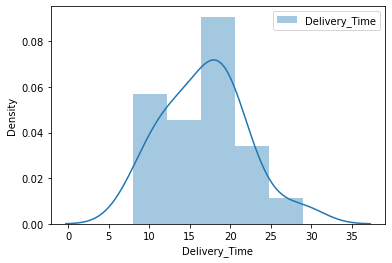

In [51]:

sns.distplot(data['Delivery_Time'],label = "Delivery_Time")
plt.legend()

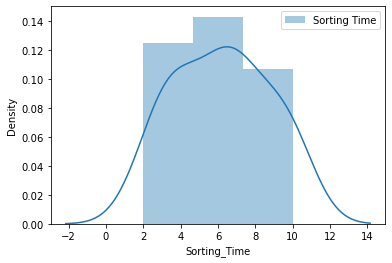

In [52]:

sns.distplot(data['Sorting_Time'],label = "Sorting Time")
plt.legend()

## fitting a linear regression model

In [53]:
model = smf.ols("Delivery_Time~Sorting_Time",data = data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

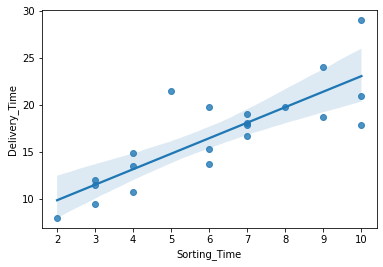

In [54]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time" , data = data )

In [55]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [56]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [57]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## predicting for new data point 

In [58]:
newdata=pd.Series([4,8])

In [59]:
# creating a dataframe for storing a new dataFrame
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [84]:
data_pred

,Sorting_Time
0,4
1,8


In [90]:
model.predict(data_pred) # predicting for new dataframe

0    13.178814
1    19.774893
dtype: float64

# predicting salary_hike

In [25]:
# importng dataset
df = pd.read_csv("Salary_Data.csv")

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [28]:
# descriptive statastics
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
# correlation 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


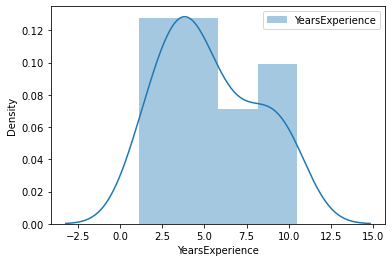

In [32]:
sns.distplot(df['YearsExperience'],label = "YearsExperience")
plt.legend()

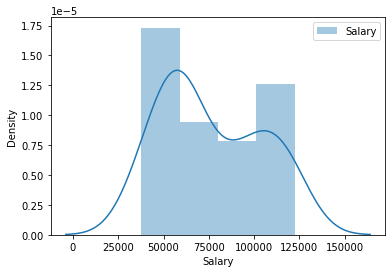

In [33]:
sns.distplot(df['Salary'],label = "Salary")
plt.legend()

## Fitting a linear regression model

In [35]:
model1 = smf.ols("Salary~YearsExperience", data = df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

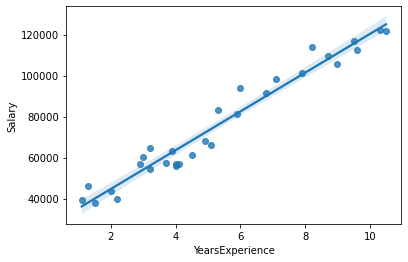

In [36]:
sns.regplot(x = "YearsExperience", y ="Salary",data = df)

In [37]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [38]:
print(model1.tvalues, '\n' ,model1.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [39]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

##  predicting for new datapoint

In [40]:
new_df = pd.Series([5,7])

In [46]:
data_pred1 =pd.DataFrame(new_df,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,5
1,7


In [47]:
model1.predict(data_pred1)

0    73042.011806
1    91941.936449
dtype: float64